In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib as mlt
import seaborn as sns

In [4]:
from numpy.random import randn
from scipy import stats

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
d1 = randn(25)

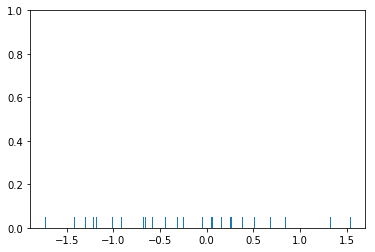

In [7]:
sns.rugplot(d1)


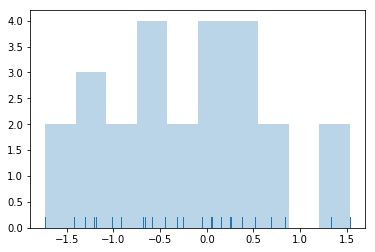

In [9]:
plt.hist(d1,alpha=0.3)
sns.rugplot(d1)

(0, 1)

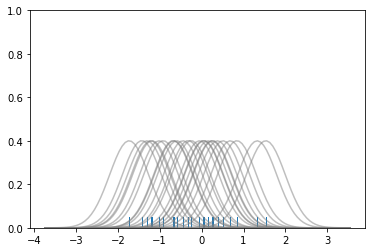

In [10]:
sns.rugplot(d1)
x_min = d1.min()-2
x_max = d1.max() +2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*d1.std()**5)/(3*len(d1)))**0.2

kernel_list = []

for data_point in d1:
    #create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)    

Text(0.5,0.98,u'Sum of the basis function')

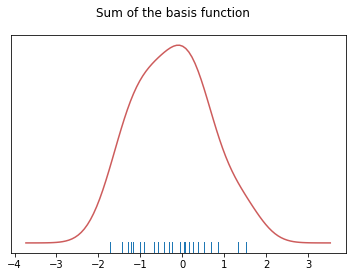

In [13]:
sum_of_kde =np.sum(kernel_list,axis=0)

fig= plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(d1)
plt.yticks([])

plt.suptitle("Sum of the basis function")

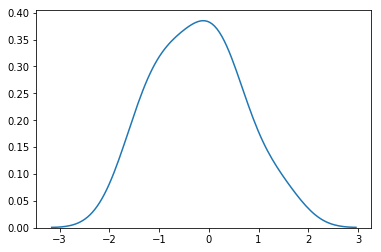

In [14]:
sns.kdeplot(d1)

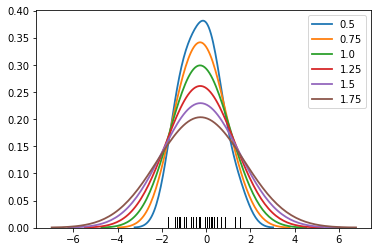

In [16]:
sns.rugplot(d1,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(d1,bw=bw,lw=1.8,label=bw)

for kernel info:  https://en.wikipedia.org/wiki/Kernel_(statistics)

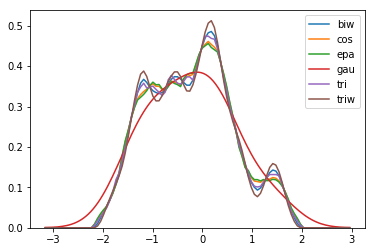

In [17]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(d1,kernel=kern,label=kern)

In [19]:
#shade

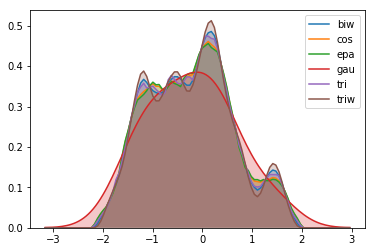

In [18]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(d1,kernel=kern,label=kern,shade=True)

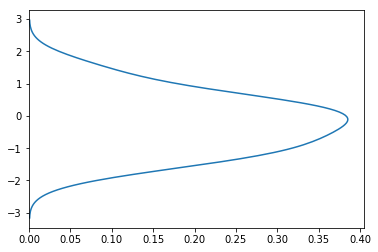

In [20]:
#vertical axis
sns.kdeplot(d1,vertical=True)

Cumulative distribution function:  https://en.wikipedia.org/wiki/Cumulative_distribution_function

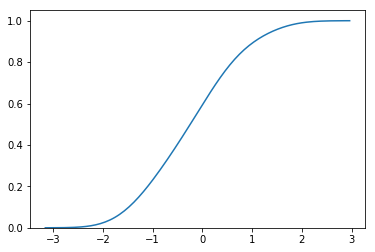

In [21]:
sns.kdeplot(d1,cumulative=True)

C:\ProgramData\Anaconda2\lib\site-packages\seaborn\distributions.py:653: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


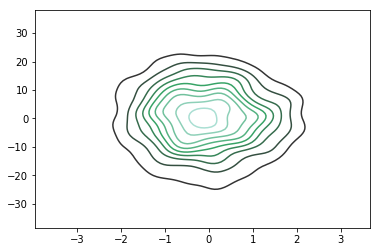

In [22]:
mean = [0,0]
cov = [[1,0],[0,100]]

d2 = np.random.multivariate_normal(mean,cov,1000)

df = pd.DataFrame(d2,columns=['x','y'])

sns.kdeplot(df)

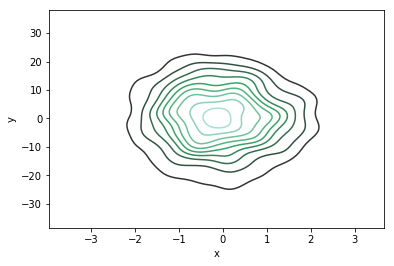

In [23]:
sns.kdeplot(df.x,df.y)

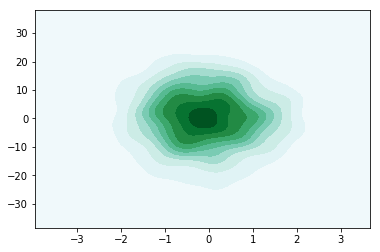

In [24]:
sns.kdeplot(df,shade=True)

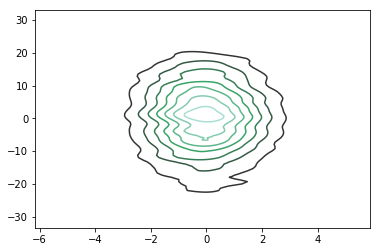

In [25]:
sns.kdeplot(df,bw=1)

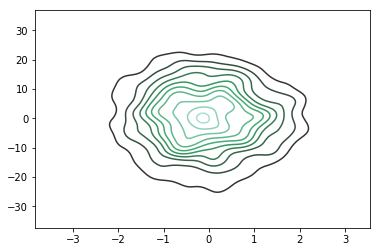

In [26]:
sns.kdeplot(df,bw='silverman')

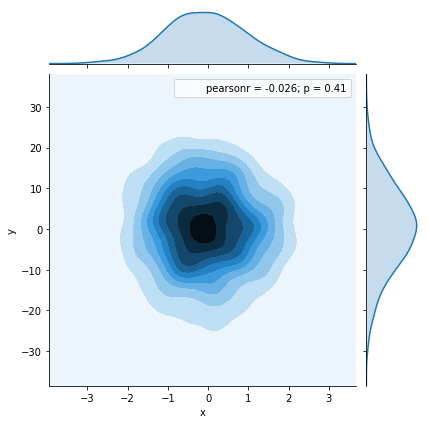

In [27]:
sns.jointplot('x','y',df,kind='kde')